# Disjoint Sets
Castillo, Anjelica M.

Given:

Students: 0, 1, 2, 3, 4

Union(0, 1) → Students 0 and 1 join the same team.

Union(1, 2) → Student 2 joins the team of 0 and 1.

Union(3, 4) → Students 3 and 4 form another team.

Find(0) → Which team is student 0 in?

Find(3) → Which team is student 3 in?

Union(2, 4) → Merge the two teams together into a single team!

In [9]:
!pip install graphviz
!pip install ipython

# Disjoint Set Implementation
#### The DisjointSet class manages a collection of sets (in this case, teams) where each element (student) belongs to exactly one set (team).

In [44]:
class DisjointSet:
    def __init__(self, n):
        self.parent = list(range(n))

    def find(self, x):
        if self.parent[x] != x:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]

# Unite the teams that contain student 'x' and student 'y'.
- This effectively merges two teams into one.
- Use a simplified form of union by rank here (attaching one root to the other) to maintain a relatively efficient tree structure.

In [45]:
def union(self, x, y):
    root_x = self.find(x)  # Corrected: Use root_x
    root_y = self.find(y)  # Corrected: Use root_y
    if root_x != root_y:
        self.parent[root_y] = root_x

  # Retrieve all the distinct teams currently formed.
- Returns a dictionary where keys are the team leaders (representatives) and
- values are the list of students belonging to each team.

In [46]:
def get_sets(self):
    sets = {}
    for i in range(len(self.parent)):
        root = self.find(i)# Find the team leader of student 'i'
        if root not in sets:
            sets[root] = []# Create a new team list if the leader is not yet a key
        sets[root].append(i) # Add student 'i' to their respective team list
    return sets

 Visualization Function

- Uses graphviz to generate a visual representation of the team structure.
- Each node represents a student, and an arrow from one student to another indicates that the latter reports directly to the former in the team hierarchy. The team leader is represented by a node with a double circle.

In [47]:
from graphviz import Digraph
from IPython.display import display

def visualize_disjoint_set(ds, step_description=""):
    dot = Digraph(comment=step_description)  # Create a new directed graph
    for element in range(len(ds.parent)):
        dot.node(str(element))  # Add a node for each student
        parent = ds.parent[element]
        if element != parent:
            dot.edge(str(parent), str(element))  # Draw an edge from the team leader to the student
        else:
            dot.node(str(element), shape='doublecircle')  # Mark the team leader with a double circle
    display(dot)  # Display the graph

Start:


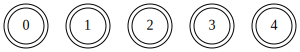

Union(0, 1): Students 0 and 1 form a team.


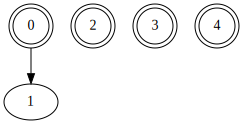

Union(1, 2): Student 2 joins the team of 0 and 1.


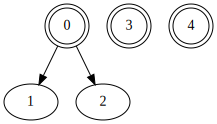

Union(3, 4): Students 3 and 4 form another team.


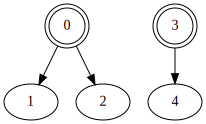

Find(0): Student 0 is in team (led by): 0
Find(3): Student 3 is in team (led by): 3
Union(2, 4): The two teams are merged into a single team.


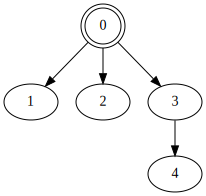

Final team structure:
{0: [0, 1, 2, 3, 4]}


In [49]:
# Example Usage: Team Formation (Following your steps)

# We have 5 students: 0, 1, 2, 3, 4
num_individuals = 5
team_sets = DisjointSet(num_individuals)

print("Start:")
visualize_disjoint_set(team_sets, "Initial state: Each student is in their own team.")

# Union(0, 1) -> Students 0 and 1 join the same team.
team_sets.union(0, 1)
print("Union(0, 1): Students 0 and 1 form a team.")
visualize_disjoint_set(team_sets, "Students 0 and 1 are now in the same team.")

# Union(1, 2) -> Student 2 joins the team of 0 and 1.
team_sets.union(1, 2)
print("Union(1, 2): Student 2 joins the team of 0 and 1.")
visualize_disjoint_set(team_sets, "Students 0, 1, and 2 are now in the same team.")

# Union(3, 4) -> Students 3 and 4 form another team.
team_sets.union(3, 4)
print("Union(3, 4): Students 3 and 4 form another team.")
visualize_disjoint_set(team_sets, "Students 3 and 4 have formed their own team.")

# Find(0) -> Which team is student 0 in?
team_of_student_0 = team_sets.find(0)
print(f"Find(0): Student 0 is in team (led by): {team_of_student_0}")

# Find(3) -> Which team is student 3 in?
team_of_student_3 = team_sets.find(3)
print(f"Find(3): Student 3 is in team (led by): {team_of_student_3}")

# Union(2, 4) -> Merge the two teams together into a single team!
team_sets.union(2, 4)
print("Union(2, 4): The two teams are merged into a single team.")
visualize_disjoint_set(team_sets, "All students are now in the same team.")

# Display the final team structure:
print("Final team structure:")
print(team_sets.get_sets())